In [3]:
import requests
import bs4
import time
import random

In [4]:
my_headers={"referer": "https://www.coupang.com/np/categories/393760",
     "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
}

In [5]:
total_data_list=[]
for page_number in range (1,18):
    url="https://www.coupang.com/np/categories/435052?channel=plp_C2&page={}".format(page_number)
    res = requests.get(url=url, headers=my_headers)
    
    soup=bs4.BeautifulSoup(res.text)
    
    div_elements =soup.select("dd.descriptions > div.name")
    for e in div_elements:
        div_elements = e
        data_list=[]
        data_list.append(div_elements.text.strip())
        total_data_list.append(data_list)
    time.sleep(1)

In [6]:
total_data_list

[['서울우유 1급A우유, 3L, 1개'],
 ['서울우유 1급A우유, 2300ml, 1개'],
 ['빙그레 바나나맛우유, 240ml, 8개'],
 ['남양유업 맛있는 우유 GT, 900ml, 2개'],
 ['블루다이아몬드 아몬드 브리즈 뉴트리플러스 프로틴, 190ml, 24개'],
 ['서울우유 비요뜨 초코링 요거트, 143g, 12개'],
 ['벨지오이오조 부라타, 226g, 1개'],
 ['남양유업 이오 요구르트, 80ml, 10개입'],
 ['후디스 유기가공식품 인증 유기농 청정목장 우유, 750ml, 2개'],
 ['유기가공식품인증 우리울타리 플레인 요구르트 무가당, 2L, 1개'],
 ['드빈치 체다슬라이스치즈 100매입, 1800g, 1개'],
 ['이즈니 버터, 10g, 60입'],
 ['신앙촌 미니 런 요구르트, 93ml, 10개'],
 ['곰곰 슈레드 모짜렐라치즈 Extra Large, 2.5kg, 1개'],
 ['그릭데이 시그니처 떠먹는 요구르트, 450g, 2개'],
 ['매일 바이오 알로에, 120g, 12개'],
 ['매일유업 무지방 0% 멸균 우유, 200ml, 24개'],
 ['상하목장 유기농 우유, 125ml, 24팩'],
 ['페이장브르통 쁘띠 버터, 10g, 40입'],
 ['시노베 구드브랜드 브라운치즈, 780g, 1개'],
 ['후디스 유기농 그릭요거트 플레인, 80g, 6개'],
 ['캘리포니아셀랙드팜스 뮌스터 슬라이스 치즈, 681g, 1개'],
 ['임실치즈마을 요거트 더 진한 플레인, 1.5L, 1개'],
 ['요플레 오프룻 복숭아, 180ml, 10개'],
 ['이즈니 가염 버터 컵 60입, 600g, 1개'],
 ['라꽁비에뜨 AOP 가염 버터, 150g, 1개'],
 ['위스콘신 크림치즈, 28g, 15개'],
 ['요즘 그릭요거트 플레인, 500g, 1개'],
 ['빙그레 요플레 플레인 화이트, 430g, 6개'],
 ['이즈니 AOP 무염 버터롤, 250g, 1개'],
 ['레인보우 큐브치즈 블랙 MIX (

In [7]:
import pandas as pd
df=pd.DataFrame(total_data_list)

In [8]:
df.to_csv('wordtext3.txt',index=False)

In [9]:
from konlpy.tag import Twitter 
from collections import Counter

In [10]:
file = open('wordtext3.txt', 'r', encoding="UTF-8")

lists = file.readlines()

file.close()

#lists

In [11]:
twitter = Twitter() 
morphs = [] 

for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

C:\Users\win10\anaconda3\envs\javaEdu\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('0', 'Number'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('서울', 'Noun'), ('우유', 'Noun'), ('1', 'Number'), ('급', 'Noun'), ('A', 'Alpha'), ('우유', 'Noun'), (',', 'Punctuation'), ('3', 'Number'), ('L', 'Alpha'), (',', 'Punctuation'), ('1', 'Number'), ('개', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('서울', 'Noun'), ('우유', 'Noun'), ('1', 'Number'), ('급', 'Noun'), ('A', 'Alpha'), ('우유', 'Noun'), (',', 'Punctuation'), ('2300', 'Number'), ('ml', 'Alpha'), (',', 'Punctuation'), ('1', 'Number'), ('개', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('빙그레', 'Noun'), ('바나나', 'Noun'), ('맛', 'Noun'), ('우유', 'Noun'), (',', 'Punctuation'), ('240', 'Number'), ('ml', 'Alpha'), (',', 'Punctuation'), ('8', 'Number'), ('개', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('남양유업', 'Noun'), ('맛있는', 'Adjective'), ('우유', 'Noun'), ('GT', 'Alpha'), (',', 'Punctuation'), ('900', 'Number'), ('ml', 'Alpha'), (',', 'Punctuation'),

In [12]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("팩" not in word)and("산" not in word)and("것" not in word)and("냉동" not in word)and("개" not in word)and("냉장" not in word)and("용" not in word)and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)

['서울', '우유', '급', '우유', '서울', '우유', '급', '우유', '빙그레', '맛', '우유', '남양유업', '우유', '블루', '다이아몬드', '아몬드', '브리', '뉴', '트리', '플러스', '프로', '틴', '서울', '우유', '비요뜨', '초코링', '요거트', '오이오조', '부라타', '남양유업', '이오', '요구르트', '후', '디스', '유기', '가공', '식품', '인증', '유기농', '청정', '목장', '우유', '유기', '가공', '식품', '인증', '우리', '울타리', '플레인', '요구르트', '무가당', '드빈치', '체다', '슬', '라이스', '치즈', '매입', '이즈', '버터', '입', '신앙촌', '미니', '런', '요구르트', '슈', '레드', '모짜렐라', '치즈', '그릭', '데이', '처', '요구르트', '매일', '바이오', '알로', '매일유업', '무', '지방', '멸균', '우유', '상하', '목장', '유기농', '우유', '페이', '브르', '통', '쁘띠', '버터', '입', '노베', '드', '브랜드', '브라운', '치즈', '후', '디스', '유기농', '그릭', '요거트', '플레인', '캘리포니아', '셀', '랙드팜스', '뮌스터', '슬', '라이스', '치즈', '임실', '치즈', '마을', '요거트', '더', '플레인', '요플레', '오프', '룻', '복숭아', '이즈', '가염', '버터', '컵', '입', '비', '가염', '버터', '위스콘신', '크림', '치즈', '요즘', '그릭', '요거트', '플레인', '빙그레', '요플레', '플레인', '화이트', '이즈', '무염', '버터', '롤', '레인보우', '큐브', '치즈', '블랙', '풀무원', '아이', '러브', '요거트', '딸기', '입', '일동후디스', '초유', '플러스', '우유', '그릭', '데이', '라이트', '요구르트'

In [13]:
count = Counter(noun_adj_adv_list)

In [14]:
words = dict(count.most_common())

In [15]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords


In [16]:
%matplotlib inline 

import matplotlib 
from matplotlib import rc
rc('font', family='NanumBarunGothic')

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = 'C:/Users/win10/workspace/font/NanumBarunGothic.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

<class 'numpy.ndarray'>
(800, 800, 3)


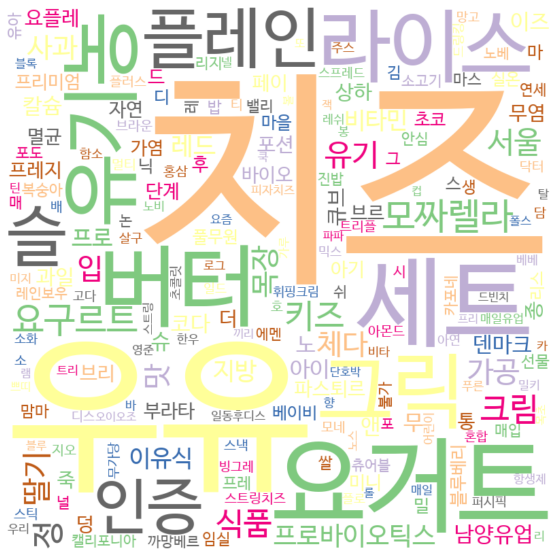

In [18]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')